In [1]:
#for Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#for array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt #plotting package
import seaborn as sns; sns.set(color_codes=True) # plotting aes
#plt.style.use('ggplot')

In [2]:
# Opening with xarray
                                                    ##   SIT  ##
sit_data = xr.open_dataset("/Users/fridaperez/Developer/repos/local_repo/SIT_25000/SIT_SH_Filled-316x332.nc")
                                                    ##   SST  ##
sia_data = xr.open_dataset("/Users/fridaperez/Developer/repos/local_repo/Area_SH_Filled-316x332.nc")
                                                    ## SIV ##
vol_data = xr.open_dataset("/Users/fridaperez/Developer/repos/local_repo/Volume_SH_ENV-CY2_2002-2018.nc")

In [3]:
sia  = sia_data.__xarray_dataarray_variable__
sit =  sit_data.SIT
siv = vol_data.volume

In [4]:
time = sit_data.time #getting time var from xarray
dates = pd.to_datetime(time.data) #turning dates into a data frame
print(dates)

DatetimeIndex(['2002-10-15', '2003-05-15', '2003-06-15', '2003-07-15',
               '2003-08-15', '2003-09-15', '2003-10-15', '2004-05-15',
               '2004-06-15', '2004-07-15', '2004-08-15', '2004-09-15',
               '2004-10-15', '2005-05-15', '2005-06-15', '2005-07-15',
               '2005-08-15', '2005-09-15', '2005-10-15', '2006-05-15',
               '2006-06-15', '2006-07-15', '2006-08-15', '2006-09-15',
               '2006-10-15', '2007-05-15', '2007-06-15', '2007-07-15',
               '2007-08-15', '2007-09-15', '2007-10-15', '2008-05-15',
               '2008-06-15', '2008-07-15', '2008-08-15', '2008-09-15',
               '2008-10-15', '2009-05-15', '2009-06-15', '2009-07-15',
               '2009-08-15', '2009-09-15', '2009-10-15', '2010-05-15',
               '2010-06-15', '2010-07-15', '2010-08-15', '2010-09-15',
               '2010-10-15', '2011-05-15', '2011-06-15', '2011-07-15',
               '2011-08-15', '2011-09-15', '2011-10-15', '2012-05-15',
      

In [5]:
sit_mean=[]
for y in range(len(sit)):
    mean = np.nanmean(sit[y])
    sit_mean.append(mean)

In [6]:
sia_mean=[]
for y in range(len(sia)):
    mean = np.nanmean(sia[y])
    sia_mean.append(mean)

In [7]:
siv_mean = []
for y in range(len(siv)):
    mean = np.nanmean(siv[y])
    siv_mean.append(mean)

In [8]:
sit_mean = pd.DataFrame(sit_mean)
sit_mean = sit_mean.rename({0: "SIT"}, axis='columns')

In [9]:
sia_mean = pd.DataFrame(sia_mean)
sia_mean = sia_mean.rename({0: "SIA"}, axis='columns')

In [10]:
dates = pd.DataFrame(dates)
dates = dates.rename({0: "Dates"}, axis='columns')

In [11]:
frames =[dates,sit_mean,sia_mean]
table = pd.concat(frames,axis=1)

In [12]:
df = table.round(2)
print(df)

        Dates   SIT     SIA
0  2002-10-15  1.14  188.89
1  2003-05-15  1.30  112.36
2  2003-06-15  1.35  148.87
3  2003-07-15  1.42  176.12
4  2003-08-15  1.41  187.11
..        ...   ...     ...
92 2018-06-15  1.45  136.74
93 2018-07-15  1.51  168.05
94 2018-08-15  1.72  186.51
95 2018-09-15  1.61  191.63
96 2018-10-15  1.22  186.17

[97 rows x 3 columns]


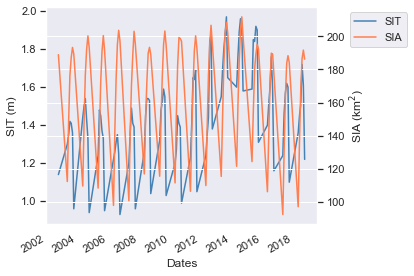

In [13]:
import matplotlib.pyplot as plt # Impot the relevant module
figsize=(14, 12)

fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
ax1=df.plot(x = 'Dates', y = 'SIT', ax = ax, label='SIT', color="steelblue")
ax1.set_ylabel('SIT (m)')
ax1.legend(loc='lower right')
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
# (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
ax2= df.plot(x = 'Dates', y = 'SIA', ax = ax, secondary_y = True, label='SIA', color="coral")
ax2.set_ylabel('SIA (km$^{2}$)')
ax2.legend(loc='lower right')
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
ax1.get_legend().remove()
#plt.title('Annual Cycle')
figsize=(14, 18)

plt.legend(handles,labels,bbox_to_anchor=(1.1,1), loc="upper left")
plt.tight_layout()
plt.savefig('/Users/fridaperez/Developer/repos/local_repo/pub_plots/timeseries_SIT-SIA.png', dpi=300)

In [14]:
siv_mean = pd.DataFrame(siv_mean)
siv_mean = siv_mean.rename({0: "SIV"}, axis='columns')

frame2 =[dates,siv_mean]
table2 = pd.concat(frame2,axis=1)

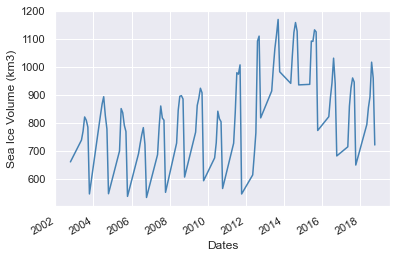

In [15]:
import matplotlib.pyplot as plt # Impot the relevant module

fig, ax = plt.subplots() # Create the figure and axes object
# Plot the first x and y axes:
ax=table2.plot(x = 'Dates', y = 'SIV', ax = ax, label='Sea Ice Volume', color="steelblue")
ax.set_ylabel('Sea Ice Volume (km3)')
#ax.set_title('Annual Sea Ice Volume 2002-2018')
ax.get_legend().remove()
#plt.savefig('/Users/fridaperez/Developer/repos/local_repo/pub_plots/annualcycle_vol.png')

In [17]:
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SIV     97 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 KB


In [20]:
table2

,Dates,SIV
0,2002-10-15,659.461067
1,2003-05-15,737.493437
2,2003-06-15,769.401901
3,2003-07-15,820.219828
4,2003-08-15,808.721687
...,...,...
92,2018-06-15,853.829720
93,2018-07-15,892.126561
94,2018-08-15,1016.209905
95,2018-09-15,959.156588


In [19]:
table2.groupby(table2.Dates.dt.year)['SIV'].transform('mean')

0     659.461067
1     744.073694
2     744.073694
3     744.073694
4     744.073694
         ...    
92    872.398372
93    872.398372
94    872.398372
95    872.398372
96    872.398372
Name: SIV, Length: 97, dtype: float64